In [ ]:
# code modified from Ori Cohen 
# https://towardsdatascience.com/pca-vs-autoencoders-1ba08362f450

# While the original author claimed Linear AE and PCA give very different results, I reached the conclusion that they are in fact extremely similar

## 2 Main differences:
    1 Used entire training set, instead of splitting for validation, since PCA also uses entire training set.
    2 Depending on the result from Linear AE, flip axis or switch axis of the encoded result.

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import decomposition, datasets
from sklearn.preprocessing import MinMaxScaler
sns.set()

In [56]:
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.losses import mse, binary_crossentropy
from keras import backend as K
from keras.utils import plot_model, to_categorical

# load data

In [3]:
iris = datasets.load_iris()
x_train = iris.data
y_train = iris.target
target_names = iris.target_names

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

# Train linear autoencoder

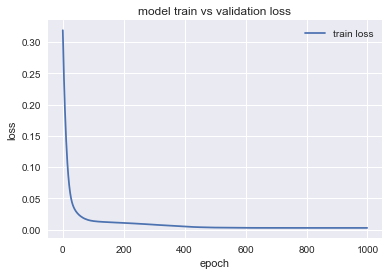

In [106]:
original_dim = x_train.shape[1]
input_shape = (original_dim,)
batch_size = 16
code_dim = 2
epochs = 1000

# autoencoder
inputs = Input(shape=input_shape)
code = Dense(code_dim, activation='linear')(inputs)
outputs = Dense(original_dim, activation='linear')(code)
autoencoder = Model(inputs, outputs)
autoencoder.compile(optimizer='adam', loss='mse')
# autoencoder.summary()

# encoder
encoder = Model(inputs = inputs, outputs = code)
# encoder.summary()

history = autoencoder.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_split=0, # Use 0 validation instead of 0.1
                verbose = 0)


plt.plot(history.history['loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss'], loc='upper right')
plt.show()

In [80]:
def plot3clusters(X, title, vtitle):
    plt.figure()
    colors = ['r', 'g', 'b']
    lw = 2

    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        plt.scatter(X[y_train == i, 0], X[y_train == i, 1], color=color, alpha=1., lw=lw,
                  label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(title)  
    plt.xlabel(vtitle + "1")
    plt.ylabel(vtitle + "2")
    plt.show()

# Run PCA on dataset

In [7]:
pca = decomposition.PCA()
pca_transformed = pca.fit_transform(x_train)

# Plot PCA results

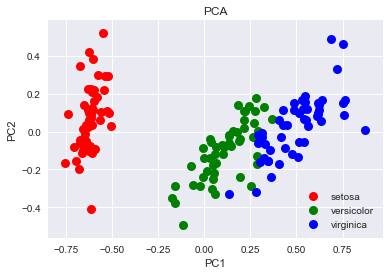

In [54]:
plot3clusters(pca_transformed[:,:2], 'PCA', 'PC')  

In [75]:
encoded_data = encoder.predict(x_train)

# Depending on the output from the encoder, you would need to perform some of following to have similar results from PCA vs Linear Autoencoders

In [78]:
def switch_axes(x):
    return np.fliplr(x)
def flip_axis_0(x):
    x[:,0] *= -1
    return x
def flip_axis_1(x):
    x[:,1] *= -1
    return x

# Plot Linear Autoencoder results

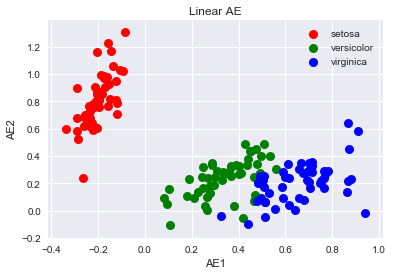

In [84]:
final = flip_axis_0(flip_axis_1(encoded_data))
plot3clusters(final, 'Linear AE', 'AE')

# Compare the 2 plots

In [100]:
def plot3clusters2(X, title, vtitle):
    colors = ['r', 'g', 'b']
    lw = 2

    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        plt.scatter(X[y_train == i, 0], X[y_train == i, 1], color=color, alpha=1., lw=lw,
                  label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(title)  
    plt.xlabel(vtitle + "1")
    plt.ylabel(vtitle + "2")

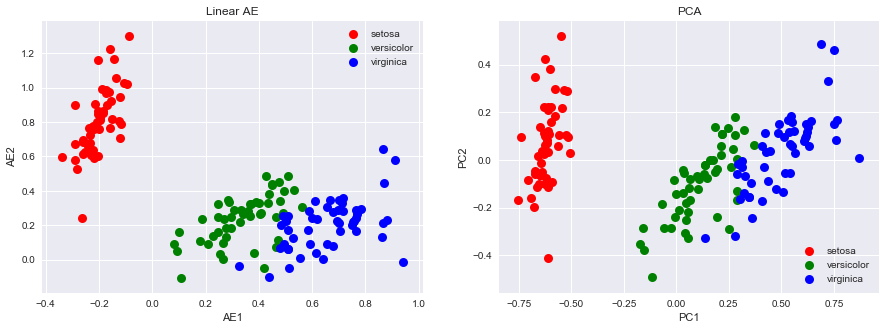

In [105]:
f, axs = plt.subplots(1,2,figsize=(15,5))
plt.subplot(121)
plot3clusters2(final, 'Linear AE', 'AE')
plt.subplot(122)
plot3clusters2(pca_transformed[:,:2], 'PCA', 'PC')
plt.show()

# As shown in above plots, they share high similarity. PCA looks extremely similar to Linear AE rotated counterclockwise by 20 degrees. 